In [1]:
import pandas as pd
import numpy as np

# Display all columns
from IPython.display import display
pd.options.display.max_columns = None

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Split train/test
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Label Encode
from sklearn.preprocessing import label_binarize

# Feature Scaling (normalize)
from sklearn.preprocessing import RobustScaler

# SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score

# Confusion Matrix
from sklearn.metrics import confusion_matrix

# ROC Curve
from sklearn.metrics import roc_curve, auc


from sklearn.metrics import r2_score

Web Watson Analytics IBM
https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
display(df.head())


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Question

Can we predict the amount claimed by a client?

We use Supervised learning methods for classification our problem

### Data Cleaning and Exploratory Analysis

In [3]:
# Columns of dataset
print( len(df.columns))
print(df.columns)
print(df.info())

24
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
Employ

In [4]:
# Missing values
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
# Know the unique values for each column
for item in df.columns.tolist():
    print(item, len(df[item].unique()))

Customer 9134
State 5
Customer Lifetime Value 8041
Response 2
Coverage 3
Education 5
Effective To Date 59
EmploymentStatus 5
Gender 2
Income 5694
Location Code 3
Marital Status 3
Monthly Premium Auto 202
Months Since Last Claim 36
Months Since Policy Inception 100
Number of Open Complaints 6
Number of Policies 9
Policy Type 3
Policy 9
Renew Offer Type 4
Sales Channel 4
Total Claim Amount 5106
Vehicle Class 6
Vehicle Size 3


### Categorical Variable

#### Effective To Date

In [6]:
# Change the type to ordinal.
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].head())
print('''''')
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].min())
print(df['Effective To Date'].max())
print(df['Effective To Date'].dt.year.value_counts())
print(df['Effective To Date'].dt.month.value_counts())
print('''''')

df['Effective To Date'] = df['Effective To Date'].apply(lambda x: x.toordinal())

object
0    2/24/11
1    1/31/11
2    2/19/11
3    1/20/11
4     2/3/11
Name: Effective To Date, dtype: object

datetime64[ns]
2011-01-01 00:00:00
2011-02-28 00:00:00
2011    9134
Name: Effective To Date, dtype: int64
1    4898
2    4236
Name: Effective To Date, dtype: int64



#### Customers
Drop customer columns, it's not relevant for our model. 

In [7]:
# Unique value for each customer
print('type', df.Customer.dtype)
print(df.Customer.head())
print(len(df.Customer.unique()))

df.drop(labels=['Customer'], axis=1, inplace=True)

type object
0    BU79786
1    QZ44356
2    AI49188
3    WW63253
4    HB64268
Name: Customer, dtype: object
9134


#### State



In [8]:
print('type', df.State.dtype)
print(df.State.unique())
print(len(df.State.unique()))
print((df.State.value_counts()/ sum(df.State.value_counts()))*100)
a =df.State.value_counts()

type object
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
5
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: State, dtype: float64


#### Response

In [9]:
print('type', df['Response'].dtype)
print(df['Response'].unique())
print((df.Response.value_counts()/sum(df.State.value_counts()))*100)

type object
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: Response, dtype: float64


#### Coverage

In [10]:
print('type', df.Coverage.dtype)
print(df.Coverage.unique())
print(len(df.Coverage.unique()))
print((df.Coverage.value_counts()/ sum(df.Coverage.value_counts()))*100)

type object
['Basic' 'Extended' 'Premium']
3
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: Coverage, dtype: float64


#### Education

In [11]:
print('type', df.Education.dtype)
print(df.Education.unique())
print(len(df.Education.unique()))
print((df.Education.value_counts()/ sum(df.Education.value_counts()))*100)

type object
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
5
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: Education, dtype: float64


#### EmploymentStatus

In [12]:
print('type', df.EmploymentStatus.dtype)
print(df.EmploymentStatus.unique())
print(len(df.EmploymentStatus.unique()))
print((df.EmploymentStatus.value_counts()/ sum(df.EmploymentStatus.value_counts()))*100)

type object
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
5
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64


#### Gender

In [13]:
print('type', df.Gender.dtype)
print(df.Gender.unique())
print(len(df.Gender.unique()))
print((df.Gender.value_counts()/ sum(df.Gender.value_counts()))*100)

type object
['F' 'M']
2
F    50.996278
M    49.003722
Name: Gender, dtype: float64


#### Location Code 

In [14]:
print('type', df['Location Code'].dtype)
print(df['Location Code'].unique())
print(len(df['Location Code'].unique()))
print((df['Location Code'].value_counts()/ sum(df['Location Code'].value_counts()))*100)

type object
['Suburban' 'Rural' 'Urban']
3
Suburban    63.269104
Rural       19.410992
Urban       17.319904
Name: Location Code, dtype: float64


#### Marital Status

In [15]:
print('type', df['Marital Status'].dtype)
print(df['Marital Status'].unique())
print(len(df['Marital Status'].unique()))
print((df['Marital Status'].value_counts()/ sum(df['Marital Status'].value_counts()))*100)

type object
['Married' 'Single' 'Divorced']
3
Married     58.003065
Single      27.008977
Divorced    14.987957
Name: Marital Status, dtype: float64


#### Policy Type

In [16]:
print('type', df['Policy Type'].dtype)
print(df['Policy Type'].unique())
print(len(df['Policy Type'].unique()))
print((df['Policy Type'].value_counts()/ sum(df['Policy Type'].value_counts()))*100)

type object
['Corporate Auto' 'Personal Auto' 'Special Auto']
3
Personal Auto     74.315743
Corporate Auto    21.545873
Special Auto       4.138384
Name: Policy Type, dtype: float64


#### Policy

In [17]:
print('type', df['Policy'].dtype)
print(df['Policy'].unique())
print(len(df['Policy'].unique()))
print((df['Policy'].value_counts()/ sum(df['Policy'].value_counts()))*100)

type object
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
9
Personal L3     37.508211
Personal L2     23.231881
Personal L1     13.575651
Corporate L3    11.101379
Corporate L2     6.514123
Corporate L1     3.930370
Special L2       1.795489
Special L3       1.620320
Special L1       0.722575
Name: Policy, dtype: float64


#### Renew Offer Type

In [18]:
print('type', df['Renew Offer Type'].dtype)
print(df['Renew Offer Type'].unique())
print(len(df['Renew Offer Type'].unique()))
print((df['Renew Offer Type'].value_counts()/ sum(df['Renew Offer Type'].value_counts()))*100)

type object
['Offer1' 'Offer3' 'Offer2' 'Offer4']
4
Offer1    41.077294
Offer2    32.034158
Offer3    15.677688
Offer4    11.210861
Name: Renew Offer Type, dtype: float64


#### Sales Channel

In [19]:
print('type', df['Sales Channel'].dtype)
print(df['Sales Channel'].unique())
print(len(df['Sales Channel'].unique()))
print((df['Sales Channel'].value_counts()/ sum(df['Sales Channel'].value_counts()))*100)

type object
['Agent' 'Call Center' 'Web' 'Branch']
4
Agent          38.066564
Branch         28.103788
Call Center    19.323407
Web            14.506240
Name: Sales Channel, dtype: float64


#### Vehicle Class

In [20]:
print('type', df['Vehicle Class'].dtype)
print(df['Vehicle Class'].unique())
print(len(df['Vehicle Class'].unique()))
print((df['Vehicle Class'].value_counts()/ sum(df['Vehicle Class'].value_counts()))*100)

type object
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
6
Four-Door Car    50.591198
Two-Door Car     20.648128
SUV              19.662798
Sports Car        5.298883
Luxury SUV        2.014451
Luxury Car        1.784541
Name: Vehicle Class, dtype: float64


#### Vehicle Size

In [21]:
print('type', df['Vehicle Size'].dtype)
print(df['Vehicle Size'].unique())
print(len(df['Vehicle Size'].unique()))
print((df['Vehicle Size'].value_counts()/ sum(df['Vehicle Size'].value_counts()))*100)

type object
['Medsize' 'Small' 'Large']
3
Medsize    70.330633
Small      19.312459
Large      10.356908
Name: Vehicle Size, dtype: float64


### Data Visualization

#### Categorical Variable

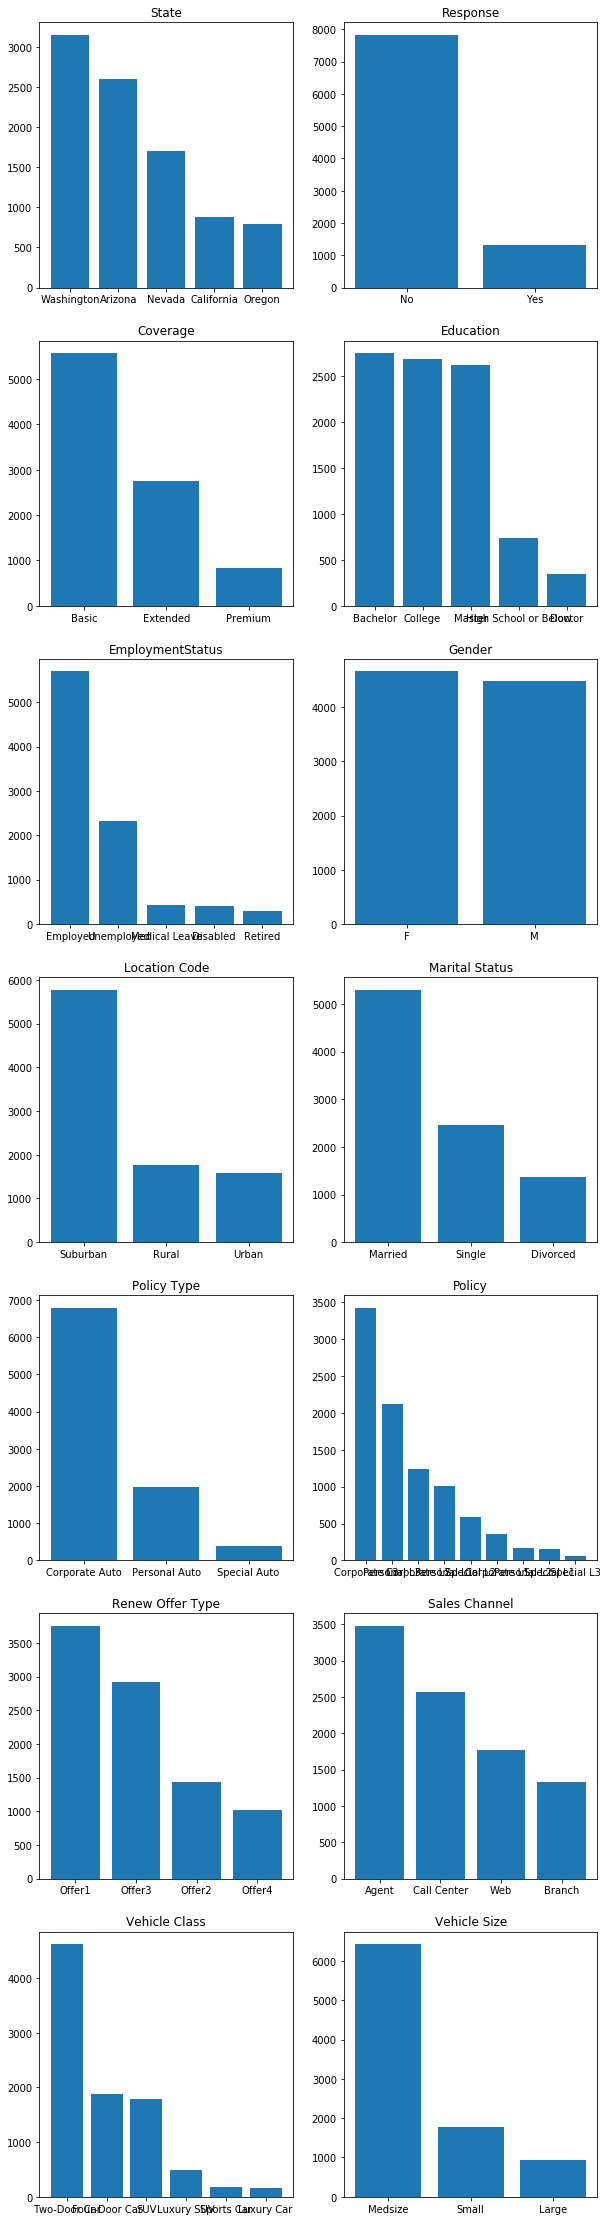

In [22]:
# Bar plot for each categorical variable.
y = [col for col in df.columns if df[col].dtype == object]
fig, axes = plt.subplots(int((len(y)/2)), 2, figsize=(10,40))
for i, x in enumerate(y):
    axes[int(i/2)][i%2].bar(df[x].unique(), df[x].value_counts())
    axes[int(i/2)][i%2].set_title(x)

### Columns - Numerical Variable

In [23]:
# Statitics 
df.describe()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,734166.837749,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,16.942769,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,734138.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,734152.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,734166.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,734181.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,734196.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


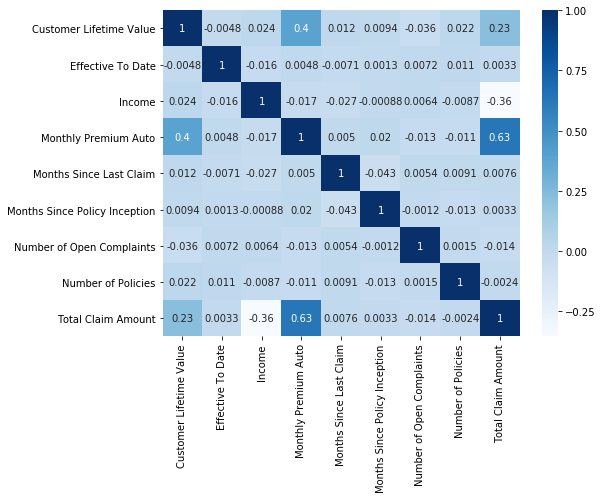

In [24]:
# Correlation Matrix
df.corr()
fig, axes = plt.subplots(1,1, figsize=(8,6))
sns.heatmap(df.corr(), cmap=plt.cm.Blues,  annot=True)

Histogram plot for each categorical variable


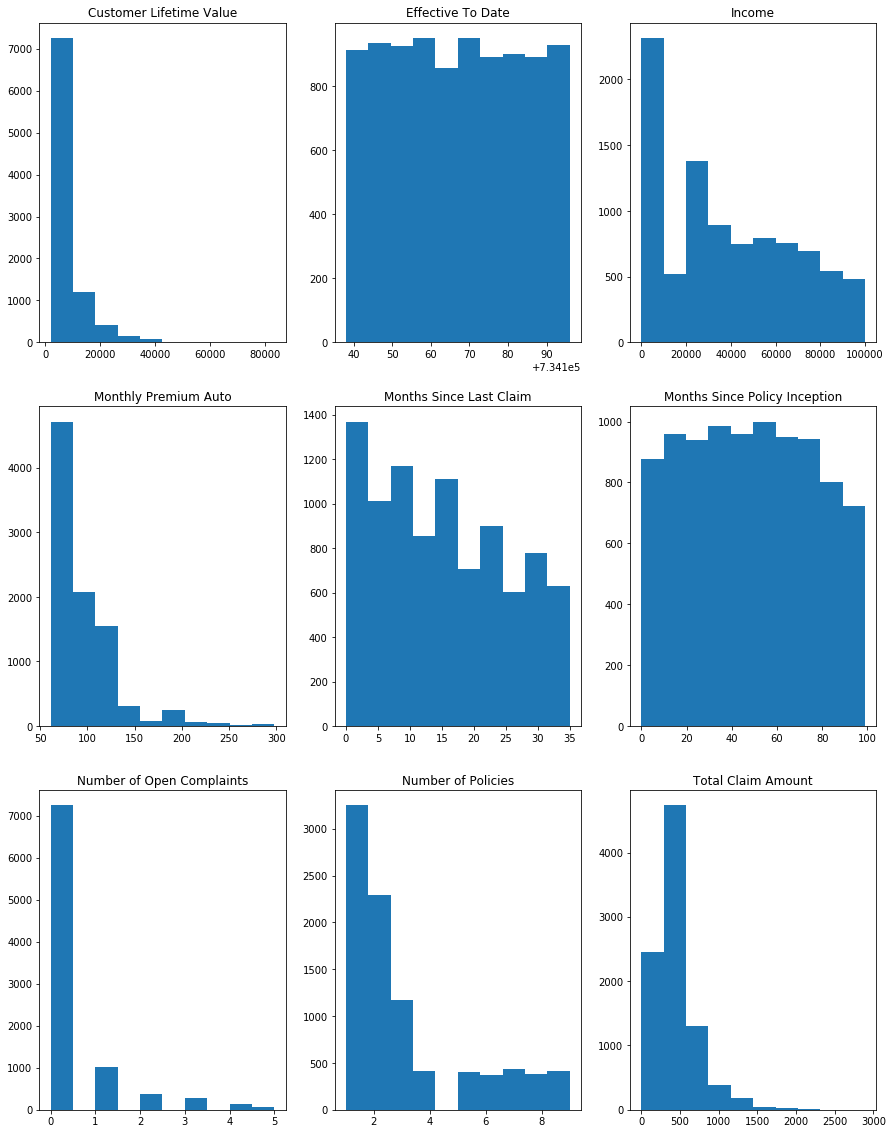

In [25]:
a = [col for col in df.columns if df[col].dtype != 'object']
fig, axes = plt.subplots(int((len(a)/3)), 3, figsize=(15,20))
for i, x in enumerate(a):
    axes[int(i/3)][i%3].hist(df[x])
    axes[int(i/3)][i%3].set_title(x)

Box plot for each categorical variable

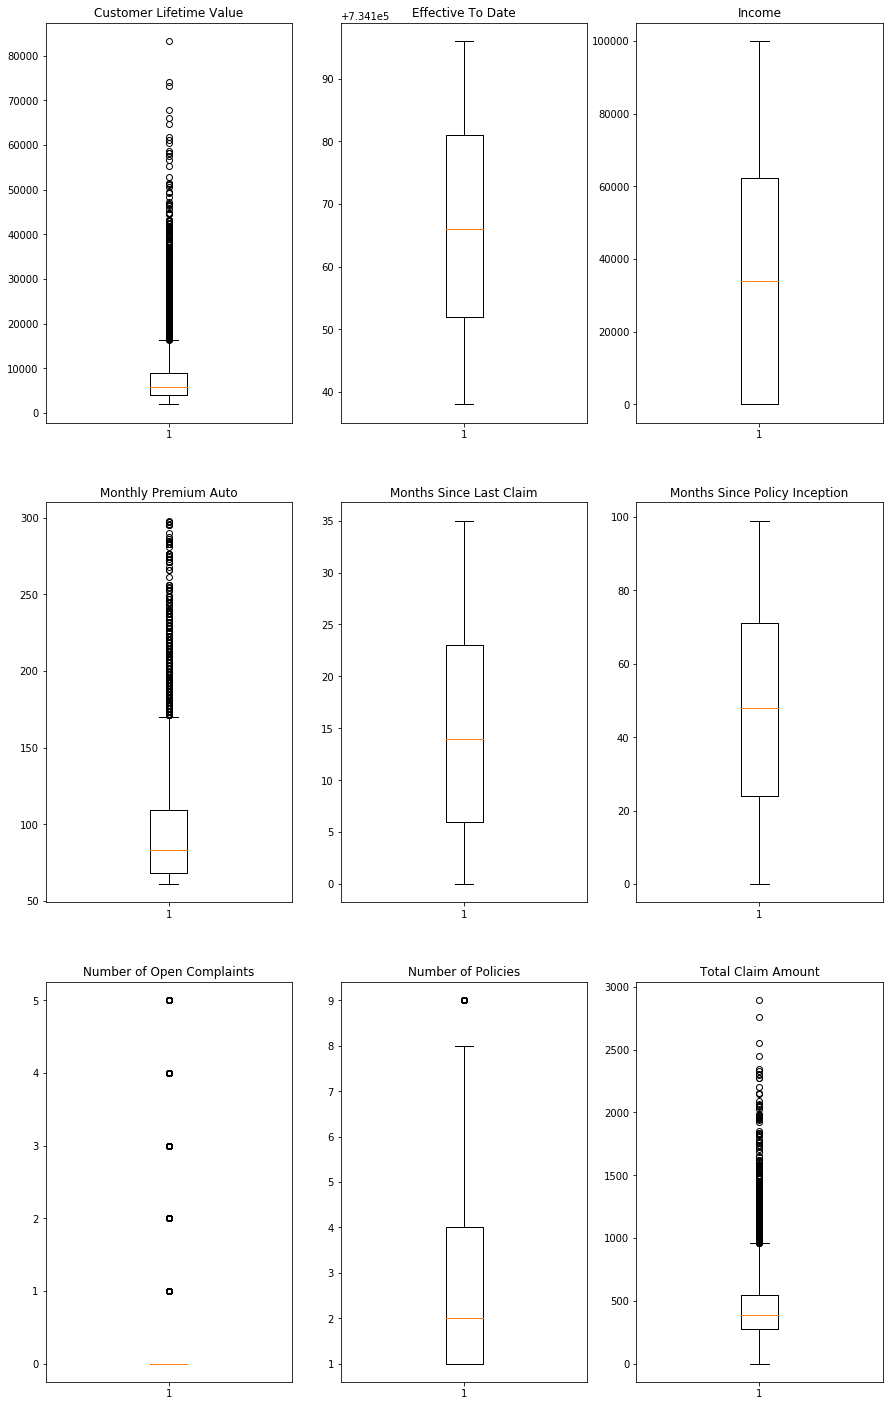

In [26]:
a = [col for col in df.columns if df[col].dtype != 'object']
fig, axes = plt.subplots(int((len(a)/3)), 3, figsize=(15,25))
for i, x in enumerate(a):
    axes[int(i/3)][i%3].boxplot(df[x])
    axes[int(i/3)][i%3].set_title(x)

---

## Machine Learning (1)

#### Target/ Data 

Total Claim Amount <br>
Convert Total Claim amount in 3 class

In [27]:
Total_claim_min = df['Total Claim Amount'].min()
Total_claim_max = df['Total Claim Amount'].max()
Total_claim_mean = df['Total Claim Amount'].mean()
Total_claim_q1 = df['Total Claim Amount'].quantile(0.25)
Total_claim_q2 = df['Total Claim Amount'].quantile(0.75)
print(Total_claim_min, Total_claim_max, Total_claim_mean, Total_claim_q1, Total_claim_q2)

0.09900700000000001 2893.239678 434.0887943128969 272.2582445 547.5148387500001


Class (labels) <br>
0: Low <br>
1:Moderate <br>
2:High <br>


In [28]:
cutoffs = [0, Total_claim_q1, Total_claim_q2, Total_claim_max]
df['Total Claim Labels'] = pd.cut(df['Total Claim Amount'],cutoffs, labels=[0,1,2])
print(df['Total Claim Labels'].head())


0    1
1    2
2    2
3    1
4    0
Name: Total Claim Labels, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [29]:
# Problems with NaN
df.index[df['Total Claim Labels'].isna() == True].tolist()

[]

In [30]:
# Change type to int64
df['Total Claim Labels'] = df['Total Claim Labels'].astype('int64')
df['Total Claim Labels'].dtype

dtype('int64')

Let's convert data to ordinal using Pandas' get_dummies

In [31]:
columns=[col for col in df.columns if df[col].dtype == object]

df_model = pd.get_dummies(data=df, columns = columns, drop_first=True)
df_model.drop(labels=['Total Claim Amount'], axis=1, inplace=True)

In [32]:
df_model.head()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Labels,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,734192,56274,69,32,5,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,734168,0,94,13,42,0,8,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,734187,48767,108,18,38,0,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,734157,0,106,18,65,0,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,734171,43836,73,12,44,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
cols = [col for col in df_model.columns if col != ['Total Claim Labels']]
X = df_model[cols]
y = df_model['Total Claim Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### SVM - SVC
First models using Support Vector Machine with SVC. <br>
Supervised learning method used for classification

In [34]:
clf = svm.SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
display(y_train.shape)
display(y_test.shape)
clf = svm.SVC()
clf.fit(X_train, y_train)
print('Score:', clf.score(X_test, y_test))
print('Intercept:', clf.intercept_)
y_pred1 = clf.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred1)
print('Accuracy SVM:', accuracy_svm)

cm_svm = metrics.confusion_matrix(y_test, y_pred1)

(7307,)

(1827,)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score: 0.5621237000547346
Intercept: [-0.45967518  0.03326047  0.4750778 ]
Accuracy SVM: 0.5621237000547346


Define a function for matrix confussion

In [36]:
def print_matrix(cm, accuracy, model):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap=plt.cm.Blues_r);
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    all_sample_title = model, 'Accuracy: {0}'.format(accuracy)
    plt.title(all_sample_title, size = 15)
    

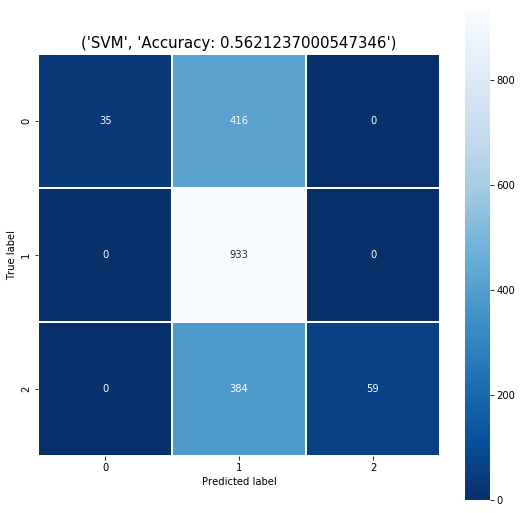

In [37]:
print_matrix(cm_svm, accuracy_svm, model='SVM')

### SVM - SVC (Robust Scaler)
Process data with robust scaler to minimize outliers.

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Robust - Accuracy: 1.0


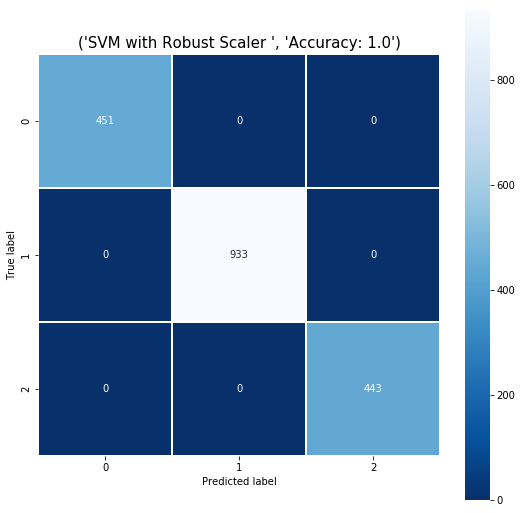

In [38]:
robut_scaler = RobustScaler().fit(X_train)

X_train_transform = robut_scaler.fit_transform(X_train)
X_test_transform = robut_scaler.transform(X_test)

clf.fit(X_train_transform, y_train)
clf.score(X_test, y_test)
y_pred_transform = clf.predict(X_test_transform)

accuracy_svm_Robust = metrics.accuracy_score(y_test, y_pred_transform)

cm_svm_robust = metrics.confusion_matrix(y_test, y_pred_transform)

print("SVM Robust - Accuracy:", accuracy_svm_Robust)

print_matrix(cm_svm_robust, accuracy_svm_Robust, model= 'SVM with Robust Scaler ')

### Logistic Regression 

Logistic Regression classifier

In [39]:
clf_logistic = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf_logistic.fit(X_train, y_train)
score = clf_logistic.score(X_test, y_test)
y_pred_logistic = clf_logistic.predict(X_test)

accuracy_logistic = metrics.accuracy_score(y_test, y_pred_logistic)

cm_logistic = metrics.confusion_matrix(y_test, y_pred_logistic)


print("Logistic Regression - Accuracy:", accuracy_logistic)

Logistic Regression - Accuracy: 0.6048166392993979


/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


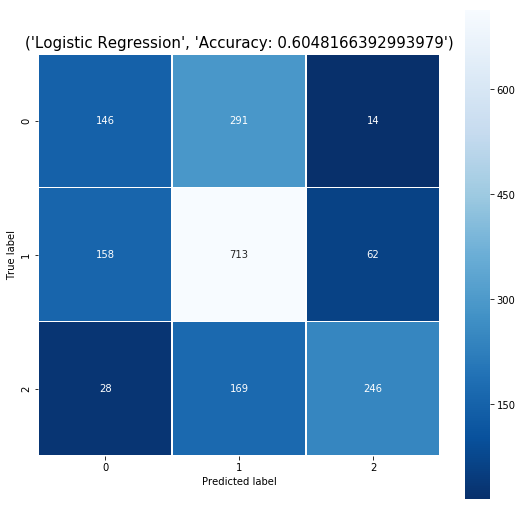

In [40]:
print_matrix(cm_logistic, accuracy_logistic, model='Logistic Regression')

### Principal components 

Dimensionality reduction with logistic regression

In [41]:
# Principal Components n=6
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

principalComponents = pca.fit_transform(X)

df_pca = pd.DataFrame(data=principalComponents, columns =['pc1', 'pc2','pc3','pc4', 'pc5','pc6'])
display(df_pca.head())
display(df_pca.shape)

X_pca = df_pca
y_pca = df_model['Total Claim Labels']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2)


clf_logistic.fit(X_train_pca, y_train_pca)
clf_logistic.score(X_test_pca, y_test_pca)
y_pred_logistic_pca = clf_logistic.predict(X_test_pca)

accuracy_pca1 = metrics.accuracy_score(y_test_pca, y_pred_logistic_pca)

print ('PCA_1 - Accuracy:', accuracy_pca1)

,pc1,pc2,pc3,pc4,pc5,pc6
0,18585.866467,-5349.487786,-16.177170,42.058203,-25.275534,16.566673
1,-37662.700044,-806.689634,1.260490,6.130771,-0.832711,-2.511542
2,11137.787342,4817.909184,4.768888,10.636871,-20.279333,2.866301
3,-37658.830504,-140.351337,13.492023,-15.916238,10.279677,2.811523
4,6148.367880,-5227.072756,-9.948868,3.090273,-4.233723,-2.988995


(9134, 6)

PCA_1 - Accuracy: 0.5801860974274767


/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [42]:
# Principal Components n=2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents2 = pca.fit_transform(X)

df_pca2 = pd.DataFrame(data=principalComponents2, columns =['pc1', 'pc2'])
display(df_pca2.head())
display(df_pca2.shape)

X_pca2 = df_pca2
y_pca2 = df_model['Total Claim Labels']

X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(X_pca2, y_pca2, test_size=0.2)


clf_logistic.fit(X_train_pca2, y_train_pca2)
clf_logistic.score(X_test_pca2, y_test_pca2)
y_pred_logistic_pca2 = clf_logistic.predict(X_test_pca2)

accuracy_pca2 = metrics.accuracy_score(y_test_pca, y_pred_logistic_pca2)

print ('PCA_2 - Accuracy:', accuracy_pca2)

,pc1,pc2
0,18585.866467,-5349.487786
1,-37662.700044,-806.689634
2,11137.787342,4817.909184
3,-37658.830504,-140.351337
4,6148.367880,-5227.072756


(9134, 2)

PCA_2 - Accuracy: 0.4236453201970443


### Random Forest Classifier

In [43]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
ks_rf = RandomForestClassifier(n_estimators=10)
ks_rf.fit(X_train, y_train)

y_pred_test_rf = ks_rf.predict(X_test)


accuracy_random = metrics.accuracy_score(y_test, y_pred_test_rf)

print('Accuracy SVM:', accuracy_random)

Accuracy SVM: 0.9956212370005474


In [45]:
cm_random = metrics.confusion_matrix(y_test, y_pred_test_rf)

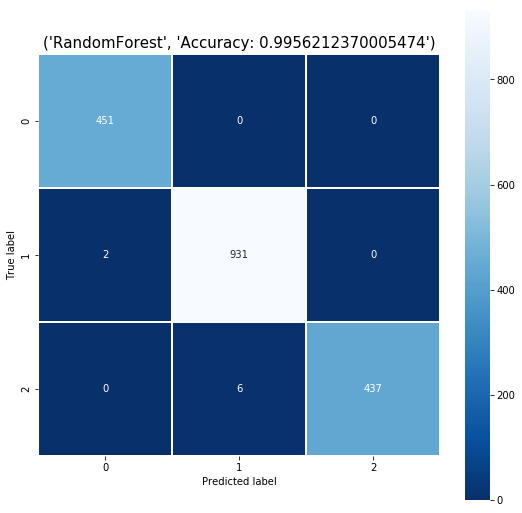

In [46]:
print_matrix(cm_random, accuracy_random, model='RandomForest')

### Cross Validation Score
Evaluate a score by cross-validation

In [47]:
scores = cross_val_score(ks_rf, X, y, cv=5)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.99507659 0.99671593 0.99890531 0.9939792  0.99945205]


---------

## Machine Learning (2)

#### Target/ Data (2)

Total Claim Amount <br>
Convert Total Claim amount in 4 class

In [48]:
df2 = df.copy()
df2.drop(labels=['Total Claim Labels'], axis=1, inplace=True)

In [49]:
df2.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,734192,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,734168,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,734187,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,734157,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,734171,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [50]:
Total_claim_min = df2['Total Claim Amount'].min()
Total_claim_max = df2['Total Claim Amount'].max()
Total_claim_mean = df2['Total Claim Amount'].mean()
Total_claim_q1 = df2['Total Claim Amount'].quantile(0.25)
Total_claim_q2 = df2['Total Claim Amount'].quantile(0.75)
print(Total_claim_min, Total_claim_max, Total_claim_mean, Total_claim_q1, Total_claim_q2)

0.09900700000000001 2893.239678 434.0887943128969 272.2582445 547.5148387500001


In [51]:
#Labels = 0: Low , Moderate, High, Very High
cutoffs = [0, Total_claim_q1, Total_claim_mean, Total_claim_q2, Total_claim_max]
df2['Total Claim Labels'] = pd.cut(df2['Total Claim Amount'],cutoffs, labels=[0,1,2,3])
print(df2['Total Claim Labels'].head())


0    1
1    3
2    3
3    2
4    0
Name: Total Claim Labels, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [52]:
# Cambiar tipo
df2['Total Claim Labels'] = df2['Total Claim Labels'].astype('int64')
df2['Total Claim Labels'].dtype

dtype('int64')

In [53]:
df2['Total Claim Labels'].isna().sum()

0

In [54]:
df2.drop(labels=['Total Claim Amount'], axis=1, inplace=True)

In [55]:
df2.head(3)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Labels
0,Washington,2763.519279,No,Basic,Bachelor,734192,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1
1,Arizona,6979.535903,No,Extended,Bachelor,734168,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,3
2,Nevada,12887.431650,No,Premium,Bachelor,734187,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,3


In [56]:
columns=[col for col in df2.columns if df2[col].dtype == object]

df_model2 = pd.get_dummies(data=df2, columns = columns, drop_first=True)

In [57]:
df_model2.head()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Labels,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,734192,56274,69,32,5,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,734168,0,94,13,42,0,8,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,734187,48767,108,18,38,0,2,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,734157,0,106,18,65,0,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,734171,43836,73,12,44,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
cols = [col for col in df_model2.columns if col != ['Total Claim Labels']]
X_2 = df_model2[cols]
y_2 = df_model2['Total Claim Labels']


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2)


### Logistic Regression  (2)
Logistic Regression classifier for 4 class

In [59]:
clf_logistic = linear_model.LogisticRegression() #multi_class='multinomial', solver='lbfgs'
clf_logistic.fit(X_train_2, y_train_2)
score2 = clf_logistic.score(X_test_2, y_test_2)
y_pred_logistic2 = clf_logistic.predict(X_test_2)

accuracy_logistic2 = metrics.accuracy_score(y_test_2, y_pred_logistic2)

cm_logistic = metrics.confusion_matrix(y_test_2, y_pred_logistic2)


print("Logistic Regression - Accuracy:", accuracy_logistic2)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression - Accuracy: 0.5270935960591133


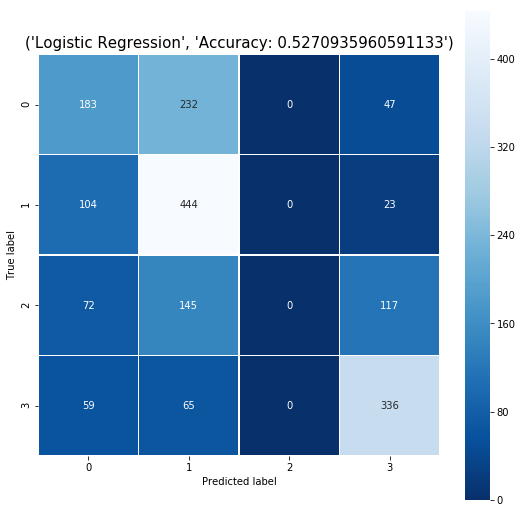

In [60]:
print_matrix(cm_logistic, accuracy_logistic2, model='Logistic Regression')

### SVM - SVC (2)
Support Vector Machine with SVC - 4 class
Grid Search for know the best parameters

#### Grid Search  SVM - SVC

In [61]:
clf2 = svm.SVC()
clf2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

parameters = {'C':[10, 20], 'gamma':('auto', 'scale'), 'coef0': [0.0, 0.1]}

svc_grid = svm.SVC()
clf = GridSearchCV(svc_grid, parameters, cv=5)

clf.fit(X_train, y_train)

clf.best_params_

In [62]:
clf = svm.SVC(C=20, gamma='scale', coef0=0.0)
clf.fit(X_train, y_train)
print('Score:', clf.score(X_test_2, y_test_2))
print('Intercept:', clf.intercept_)

y_pred2 = clf.predict(X_test_2)


accuracy_svm = metrics.accuracy_score(y_test_2, y_pred2)
print('Accuracy SVM:', accuracy_svm)

Score: 0.4050355774493706
Intercept: [-0.209969    0.14054961  0.26617004]
Accuracy SVM: 0.4050355774493706


In [63]:
cm_svm = metrics.confusion_matrix(y_test_2, y_pred1)

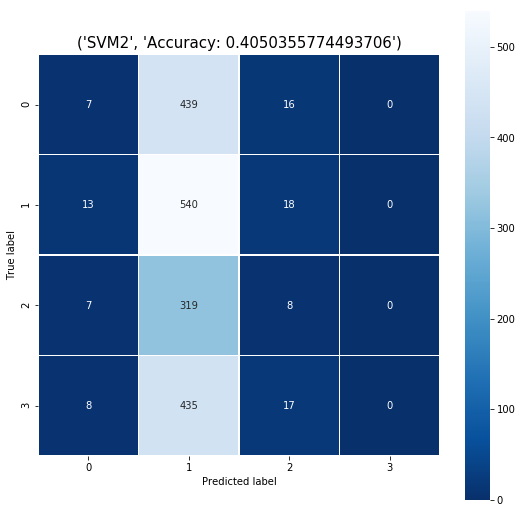

In [64]:
print_matrix(cm_svm, accuracy_svm, model='SVM2')

n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred1[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    #plt.plot([0, 1], [0, 1], 'k--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Random Forest 

In [65]:
parameters = {'n_estimators':[5, 10, 15, 30, 50, 80, 100]}

ks_grid = RandomForestClassifier()
clf_grid = GridSearchCV(ks_grid, parameters, cv=5)

clf_grid.fit(X_train, y_train)

clf_grid.best_params_

{'n_estimators': 50}

In [66]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
ks_rf = RandomForestClassifier(n_estimators=50)
ks_rf.fit(X_train_2, y_train_2)

y_pred_test_rf = ks_rf.predict(X_test_2)


accuracy_random = metrics.accuracy_score(y_test_2, y_pred_test_rf)

print('Accuracy SVM:', accuracy_random)

Accuracy SVM: 0.9994526546250684


In [68]:
cm_random = metrics.confusion_matrix(y_test_2, y_pred_test_rf)

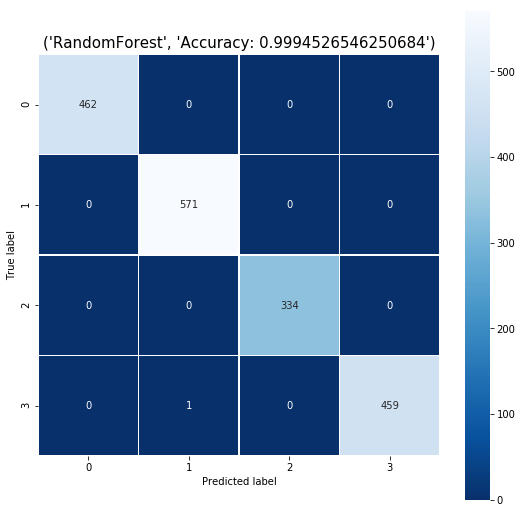

In [69]:
print_matrix(cm_random, accuracy_random, model='RandomForest')

#### Cross Validation 
Cross Validation for Random Forest

In [70]:
scores = cross_val_score(ks_rf, X_2, y_2, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.99868766 0.9980315  0.9993434  0.99671701 0.99934211 0.99934211]


#### ROC CURVE
Random Forest Roc Curve

In [71]:
y_2.unique()

array([1, 3, 2, 0])

In [72]:
# Binarize data target class
y_binarize = label_binarize(y_2, classes=[0,1,2,3])
n_classes = 4
X_train_binarize, X_test_binarize, y_train_binarize, y_test_binarize =train_test_split(X_2, y_binarize, test_size=0.33, random_state=0)


ks_binarize = RandomForestClassifier(n_estimators=10).fit(X_train_binarize, y_train_binarize)

y_pred_test_binarize = ks_binarize.predict(X_test_binarize)

In [73]:
y_binarize.shape

(9134, 4)

In [74]:
type(y_binarize)

numpy.ndarray

In [75]:
y_binarize[:,3]

array([0, 1, 1, ..., 1, 1, 0])

In [78]:
n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:,i], y_pred_test_binarize[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #print(i, roc_auc[i])
    print('roc_auc', i, roc_auc[i])

roc_auc 0 0.998661311914324
roc_auc 1 0.9909762512570588
roc_auc 2 0.9344026341365618
roc_auc 3 0.9701755566366826


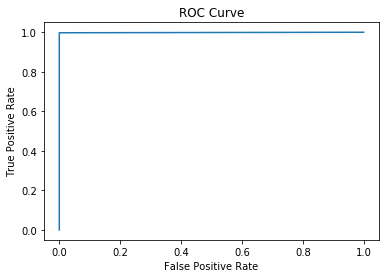

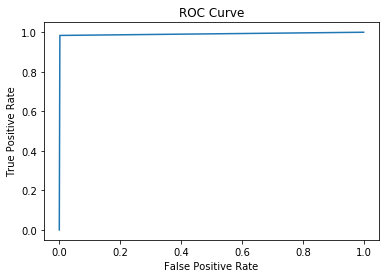

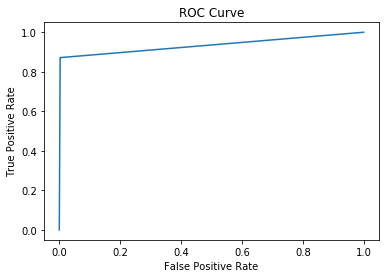

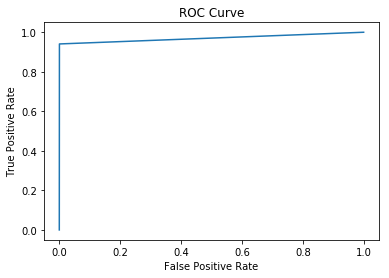

In [77]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title ('ROC Curve')
    plt.show()

---

## Eliminate Features 

In [131]:
df3 = df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null int64
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      91

In [123]:
df3.head()

,State,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Labels
0,Washington,Basic,Bachelor,734192,Employed,F,56274,Suburban,Married,69,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1
1,Arizona,Extended,Bachelor,734168,Unemployed,F,0,Suburban,Single,94,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,3
2,Nevada,Premium,Bachelor,734187,Employed,F,48767,Suburban,Married,108,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,3
3,California,Basic,Bachelor,734157,Unemployed,M,0,Suburban,Married,106,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2
4,Washington,Basic,Bachelor,734171,Employed,M,43836,Rural,Single,73,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0


Let's eliminate a 3 features than it can be unknown per client: <br>
Months Since Last Claim <br>
Months Since Policy Inception <br>
Number of Open Complaints <br>
Response <br>

In [132]:
df3.drop(labels=['Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Response'], axis=1, inplace=True)

Eliminate a feature 'Customer Lifetime Value' than can be very important for our model discriminant. 

In [133]:
df3.drop(labels=['Customer Lifetime Value'], axis=1, inplace=True)

In [118]:
columns=[col for col in df3.columns if df3[col].dtype == object]

df_model3 = pd.get_dummies(data=df3, columns = columns, drop_first=True)

In [119]:
df_model3.head()

,Effective To Date,Income,Monthly Premium Auto,Number of Policies,Total Claim Labels,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,734192,56274,69,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,734168,0,94,8,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,734187,48767,108,2,3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,734157,0,106,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,734171,43836,73,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [120]:
cols = [col for col in df_model3.columns if col != ['Total Claim Labels']]
X_3 = df_model3[cols]
y_3 = df_model3['Total Claim Labels']


X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2)

Accuracy SVM: 0.9978106185002736


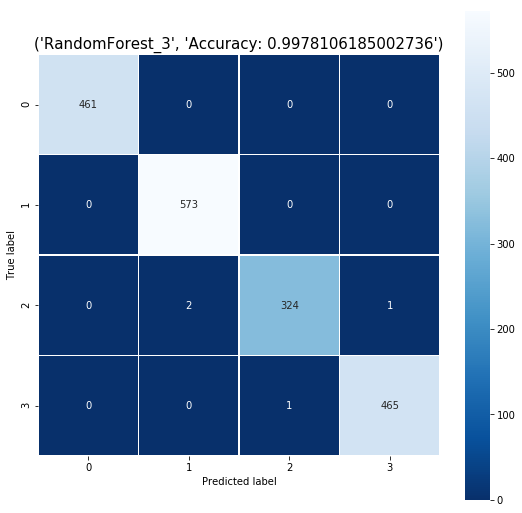

In [121]:
RandomForestClassifier()

ks_rf = RandomForestClassifier(n_estimators=50)
ks_rf.fit(X_train_3, y_train_3)

y_pred_test_rf = ks_rf.predict(X_test_3)


accuracy_random = metrics.accuracy_score(y_test_3, y_pred_test_rf)

print('Accuracy SVM:', accuracy_random)


cm_random = metrics.confusion_matrix(y_test_3, y_pred_test_rf)

print_matrix(cm_random, accuracy_random, model='RandomForest_3')

Let's check if there is a variable that discriminates our model

In [138]:
df3['Location Code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [143]:
df3['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [134]:
df3.loc[df3['Total Claim Labels'] == 3]

,State,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Labels
1,Arizona,Extended,Bachelor,734168,Unemployed,F,0,Suburban,Single,94,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,3
2,Nevada,Premium,Bachelor,734187,Employed,F,48767,Suburban,Married,108,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,3
17,California,Basic,College,734142,Medical Leave,M,28855,Suburban,Married,101,1,Personal Auto,Personal L2,Offer3,Call Center,SUV,Medsize,3
23,Nevada,Basic,Bachelor,734192,Unemployed,F,0,Suburban,Single,73,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,3
26,California,Premium,Bachelor,734196,Unemployed,F,0,Suburban,Single,111,1,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Small,3
31,Nevada,Extended,High School or Below,734159,Employed,M,65999,Urban,Married,237,6,Corporate Auto,Corporate L2,Offer2,Agent,Luxury SUV,Medsize,3
36,California,Premium,Bachelor,734145,Employed,M,42305,Suburban,Married,117,2,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Small,3
38,Oregon,Extended,Bachelor,734162,Unemployed,M,0,Suburban,Single,90,1,Personal Auto,Personal L2,Offer3,Agent,Two-Door Car,Small,3
42,California,Extended,Bachelor,734165,Employed,F,60021,Suburban,Married,99,1,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Small,3
46,Arizona,Basic,Bachelor,734168,Unemployed,M,0,Suburban,Single,73,5,Personal Auto,Personal L3,Offer3,Call Center,Four-Door Car,Medsize,3


In [144]:
df3.loc[df3['Total Claim Labels'] == 2]

,State,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Labels
3,California,Basic,Bachelor,734157,Unemployed,M,0,Suburban,Married,106,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2
8,Oregon,Basic,Bachelor,734163,Medical Leave,M,14072,Suburban,Divorced,71,2,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize,2
10,California,Basic,College,734189,Unemployed,M,0,Suburban,Single,67,3,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Small,2
11,California,Basic,College,734143,Unemployed,F,0,Suburban,Married,110,3,Personal Auto,Personal L3,Offer2,Agent,SUV,Medsize,2
12,California,Premium,Master,734174,Employed,M,77026,Urban,Married,110,3,Corporate Auto,Corporate L1,Offer2,Agent,Four-Door Car,Medsize,2
13,Arizona,Basic,High School or Below,734147,Employed,M,99845,Suburban,Married,110,8,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Medsize,2
16,Nevada,Basic,High School or Below,734174,Medical Leave,M,25049,Suburban,Married,67,1,Personal Auto,Personal L3,Offer2,Call Center,Two-Door Car,Medsize,2
19,California,Premium,High School or Below,734151,Employed,F,66140,Suburban,Married,101,3,Corporate Auto,Corporate L2,Offer1,Call Center,Four-Door Car,Small,2
22,Arizona,Basic,Bachelor,734163,Medical Leave,M,14072,Suburban,Divorced,71,2,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize,2
24,California,Basic,Bachelor,734173,Disabled,F,17870,Suburban,Married,61,1,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,2


In [145]:
df3.loc[df3['Total Claim Labels'] == 0]

,State,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Labels
4,Washington,Basic,Bachelor,734171,Employed,M,43836,Rural,Single,73,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0
5,Oregon,Basic,Bachelor,734162,Employed,F,62902,Rural,Married,69,2,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize,0
15,Oregon,Basic,Bachelor,734154,Employed,F,24599,Rural,Married,64,2,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,0
34,Oregon,Basic,Bachelor,734181,Employed,F,37260,Rural,Married,62,8,Corporate Auto,Corporate L1,Offer3,Web,Four-Door Car,Medsize,0
35,Arizona,Basic,High School or Below,734152,Employed,F,68987,Urban,Married,71,6,Personal Auto,Personal L1,Offer1,Branch,Four-Door Car,Medsize,0
39,Arizona,Basic,High School or Below,734175,Employed,M,53243,Rural,Divorced,66,1,Personal Auto,Personal L3,Offer1,Call Center,Four-Door Car,Medsize,0
41,Oregon,Basic,College,734148,Employed,F,50071,Rural,Single,71,1,Corporate Auto,Corporate L3,Offer2,Agent,Two-Door Car,Medsize,0
45,Oregon,Premium,Doctor,734162,Disabled,F,10105,Rural,Married,172,3,Personal Auto,Personal L2,Offer1,Branch,SUV,Medsize,0
52,Nevada,Basic,High School or Below,734189,Employed,F,36014,Rural,Married,69,2,Special Auto,Special L1,Offer4,Branch,Four-Door Car,Medsize,0
63,California,Basic,High School or Below,734164,Employed,F,66525,Rural,Married,100,2,Personal Auto,Personal L3,Offer1,Agent,SUV,Medsize,0


In [146]:
df3.loc[df3['Total Claim Labels'] == 1]

,State,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Total Claim Labels
0,Washington,Basic,Bachelor,734192,Employed,F,56274,Suburban,Married,69,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,1
6,Oregon,Basic,College,734192,Employed,F,55350,Suburban,Married,67,9,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize,1
7,Arizona,Premium,Master,734155,Unemployed,M,0,Urban,Single,101,4,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize,1
9,Oregon,Extended,College,734185,Employed,F,28812,Urban,Married,93,8,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize,1
14,California,Basic,College,734155,Employed,M,83689,Urban,Single,70,8,Corporate Auto,Corporate L3,Offer4,Call Center,Four-Door Car,Medsize,1
18,Oregon,Basic,College,734195,Employed,M,51148,Urban,Married,72,7,Personal Auto,Personal L2,Offer2,Branch,Four-Door Car,Medsize,1
20,Oregon,Basic,High School or Below,734187,Employed,M,57749,Suburban,Single,74,1,Personal Auto,Personal L2,Offer1,Branch,Two-Door Car,Medsize,1
21,Washington,Extended,Bachelor,734158,Disabled,F,13789,Suburban,Divorced,79,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,1
25,Oregon,Basic,College,734166,Employed,M,97541,Suburban,Married,72,3,Personal Auto,Personal L3,Offer2,Call Center,Four-Door Car,Large,1
29,Oregon,Extended,Master,734175,Employed,F,75690,Suburban,Married,80,1,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Small,1
